## Load Data

In [67]:
import numpy as np
import pandas as pd
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [68]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print(df_train.describe())
print(df_train.head())

print(df_test.describe())
print(df_test.head())

                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
                 id
count   3263.000000
mean    5427.152927
std     3146.427221
min        0.000000
25%     2683.000000
50%     5500.000000
75%     8176.000000
max    10875.0000

In [69]:
df_train[df_train['target'] == 0]['text'].values[0]

"What's up man?"

In [70]:
df_train[df_train['target'] == 1]['text'].values[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [71]:
df_train['text'].values[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

## Create Features

In [72]:
# let's get counts for the first 5 tweets in the data
count_vectorizer = feature_extraction.text.CountVectorizer()
example_train_vectors = count_vectorizer.fit_transform(df_train["text"][0:5])

## we use .todense() here because these vectors are "sparse" (only non-zero elements are kept to save space)
print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())

(1, 54)
[[0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


In [73]:
# let's get counts for all tweets in the data
count_vectorizer = feature_extraction.text.CountVectorizer()
train_vectors = count_vectorizer.fit_transform(df_train['text'])
test_vectors = count_vectorizer.transform(df_test['text'])

print(train_vectors[0].todense().shape)
print(test_vectors[0].todense().shape)

(1, 21637)
(1, 21637)


## Train Models

In [74]:
import keras
import tensorflow
print(keras.__version__)
print(tensorflow.__version__)

2.4.3
2.3.0


In [75]:
# Building our network
from keras import models
from keras import layers

In [76]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(21637,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [77]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [78]:
# Validation data
x_val = train_vectors[:2000].toarray()
partial_x_train = train_vectors[2000:].toarray()

y_val = df_train['target'][:2000].to_numpy()
partial_y_train = df_train['target'][2000:].to_numpy()

In [79]:
print(type(train_vectors))
print(x_val.shape)
print(y_val.shape)
print(partial_x_train.shape)
print(partial_y_train.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(2000, 21637)
(2000,)
(5613, 21637)
(5613,)


In [80]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
11/11 [==============================] - 1s 65ms/step - loss: 0.6608 - binary_accuracy: 0.7100 - val_loss: 0.6502 - val_binary_accuracy: 0.7195
Epoch 2/20
11/11 [==============================] - 0s 40ms/step - loss: 0.5696 - binary_accuracy: 0.8448 - val_loss: 0.6096 - val_binary_accuracy: 0.7310
Epoch 3/20
11/11 [==============================] - 0s 40ms/step - loss: 0.4841 - binary_accuracy: 0.8837 - val_loss: 0.5754 - val_binary_accuracy: 0.7445
Epoch 4/20
11/11 [==============================] - 0s 40ms/step - loss: 0.4118 - binary_accuracy: 0.8986 - val_loss: 0.5468 - val_binary_accuracy: 0.7600
Epoch 5/20
11/11 [==============================] - 0s 39ms/step - loss: 0.3503 - binary_accuracy: 0.9136 - val_loss: 0.5329 - val_binary_accuracy: 0.7560
Epoch 6/20
11/11 [==============================] - 0s 41ms/step - loss: 0.2989 - binary_accuracy: 0.9230 - val_loss: 0.5155 - val_binary_accuracy: 0.7585
Epoch 7/20
11/11 [==============================] - 0s 39ms/step - los

In [81]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

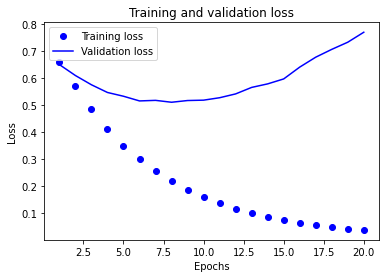

In [82]:
# Loss Curve plot
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

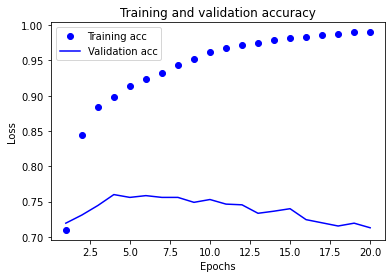

In [83]:
# Accuracy Curve plot
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [86]:
# Test data
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(21637,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512)
results = model.evaluate(x_val, y_val)

Epoch 1/4
11/11 [==============================] - 0s 31ms/step - loss: 0.6751 - accuracy: 0.7019
Epoch 2/4
11/11 [==============================] - 0s 31ms/step - loss: 0.6128 - accuracy: 0.8270
Epoch 3/4
11/11 [==============================] - 0s 30ms/step - loss: 0.5450 - accuracy: 0.8594
Epoch 4/4
63/63 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7660


In [87]:
results

[0.5718423128128052, 0.765999972820282]

In [88]:
# Test the model
model.predict(x_test)

array([[0.51922786],
       [0.42774123],
       [0.5629683 ],
       ...,
       [0.66385883],
       [0.64598954],
       [0.58131987]], dtype=float32)

In [89]:
sample_submission = pd.read_csv('sample_submission.csv')

In [108]:
sample_submission['target'] = np.round(model.predict(test_vectors))
sample_submission['target'] = sample_submission['target'].astype('int')
sample_submission.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1


In [109]:
sample_submission.to_csv('submission.csv', index=False)